# **Facial Emotion Detection**

## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What are we trying to solve using data science?



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [2]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load the data**

**Note:** 
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [3]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [4]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing our Classes**

Let's look at our classes. 

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

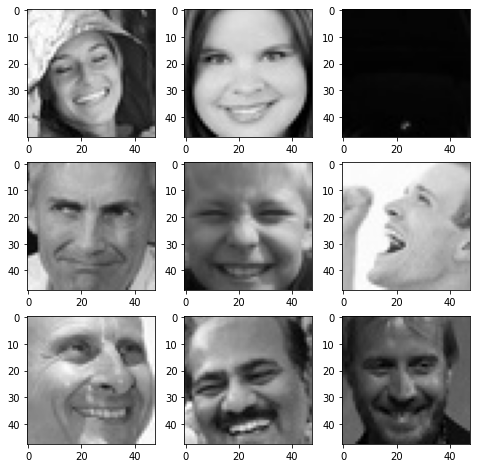

In [36]:
expression = 'happy'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights: Generally, we see what we expect - smiles and eyebrows slightly raised. I am slightly concerned about the text on the bottom-middle image. If the text is related to the emotion shown, the model may learn to read the text instead of the facial emotions. Since there is only one image with this issue so far, I will proceed with the analysis and keep it in mind for later.**

### **Sad**

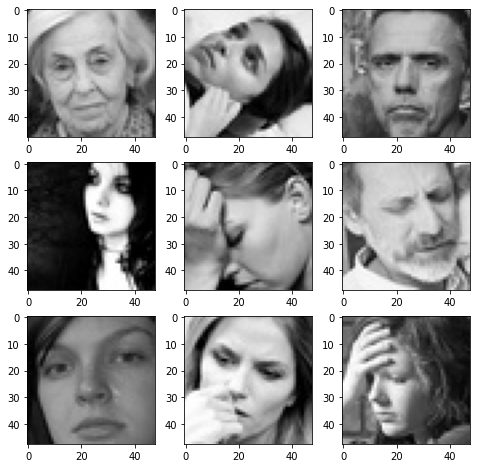

In [6]:
expression = 'sad'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights: Similarly to the happy images, we see what we would expect. Mostly frowns and eyebrows slightly lowered. We also see text on the top-right image but we will proceed cautiously.**

### **Neutral**

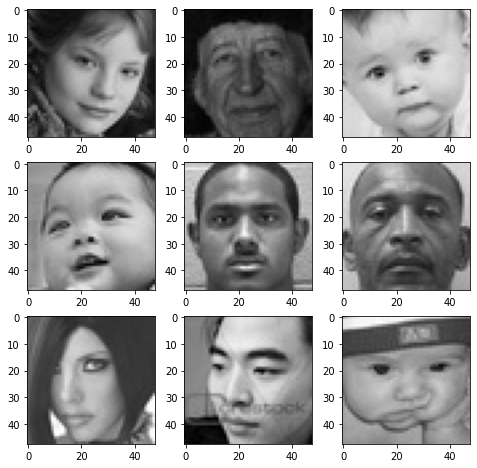

In [7]:
expression = 'neutral'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights: As expected, mouth and eybrows are usually straight showing little emotion.**

### **Surprised**

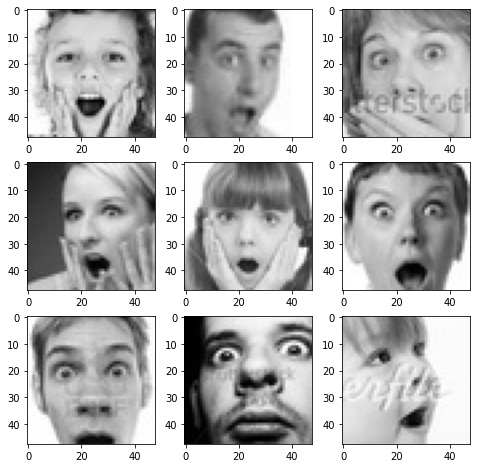

In [8]:
expression = 'surprise'

plt.figure(figsize= (8,8))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights: As one might expect, we see eyes open wide and mouth open in most of the images. Several images in this collection have text on them.**

## **Checking Distribution of Classes**

In [9]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':   ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':   ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':   ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':    3976
Number of images in the class 'sad':    3982
Number of images in the class 'neutral':    3978
Number of images in the class 'surprise':    3173


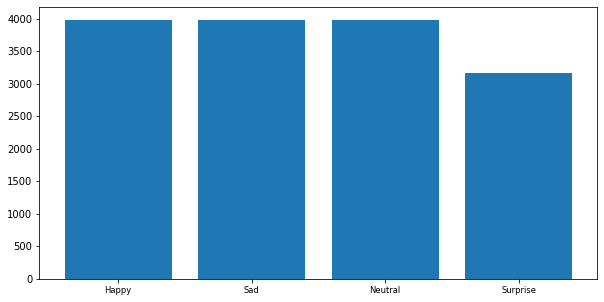

In [10]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights:The training set appears to be well-balanced, with only slightly less 'surprise' examples than the other categories.**

**Think About It:** 
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. A sample of the required code has been given with respect to the training data. Please create the data loaders for validation and test set accordingly.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [11]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead? 
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

Our Base Neural network will be a fairly simple model architecture.

* We want our Base Neural Network architecture to have 3 convolutional blocks.
* Each convolutional block must contain one Conv2D layer followed by a maxpooling layer and one Dropout layer. We can play around with the dropout ratio.
* Add first Conv2D layer with **64 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add MaxPooling2D layer with **pool size = 2**.
* Add a Dropout layer with a dropout ratio of 0.2.
* Add a second Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar Maxpooling2D layer like above and a Dropout layer with 0.2 Dropout ratio to complete your second Convolutional Block.
* Add a third Conv2D layer with **32 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a Maxpooling2D layer and a Dropout layer to complete your third Convolutional block.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add a Dropout layer with dropout ratio of 0.4.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [12]:
# Initializing a Sequential Model
model1 = Sequential()

model1.add(Conv2D(64, kernel_size=(2), padding='same', activation='relu', input_shape=(48,48,3)))
model1.add(MaxPooling2D(pool_size=(2)))
model1.add(Dropout(rate=0.2))

model1.add(Conv2D(32, kernel_size=(2), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2)))
model1.add(Dropout(rate=0.2))

model1.add(Conv2D(32, kernel_size=(2), padding='same', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2)))
model1.add(Dropout(rate=0.2))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))

model1.add(Dropout(rate=0.4))

model1.add(Dense(4, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

### **Compiling and Training the Model**

In [13]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [14]:
from tensorflow.keras.losses import categorical_crossentropy

model1.compile(optimizer=Adam(learning_rate = 0.001), loss=categorical_crossentropy, metrics='accuracy')

In [15]:
# Write your code to fit your model1. Use train_set as your training data and validation_set as your validation data.

history = model1.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
473/473 [==============================] - 35s 55ms/step - loss: 1.3780 - accuracy: 0.2765 - val_loss: 1.3476 - val_accuracy: 0.3597
Epoch 2/20
473/473 [==============================] - 25s 54ms/step - loss: 1.2613 - accuracy: 0.4082 - val_loss: 1.2170 - val_accuracy: 0.4386
Epoch 3/20
473/473 [==============================] - 26s 54ms/step - loss: 1.1713 - accuracy: 0.4780 - val_loss: 1.0833 - val_accuracy: 0.5361
Epoch 4/20
473/473 [==============================] - 25s 54ms/step - loss: 1.1180 - accuracy: 0.5052 - val_loss: 1.0792 - val_accuracy: 0.5369
Epoch 5/20
473/473 [==============================] - 25s 54ms/step - loss: 1.0773 - accuracy: 0.5337 - val_loss: 1.0019 - val_accuracy: 0.5817
Epoch 6/20
473/473 [==============================] - 26s 54ms/step - loss: 1.0503 - accuracy: 0.5437 - val_loss: 0.9844 - val_accuracy: 0.5746
Epoch 7/20
473/473 [==============================] - 28s 59ms/step - loss: 1.0282 - accuracy: 0.5464 - val_loss: 0.9440 - val_accuracy:

### **Evaluating the Model on the Test Set**

In [29]:
model1_eval = model1.evaluate(test_set) 

# Model.evaluate() outputs the test loss and the test accuracy, hence:
print('Model1 Test loss:', model1_eval[0]) 
print('Model1 Test accuracy:', model1_eval[1])

4/4 [==============================] - 0s 39ms/step - loss: 0.7958 - accuracy: 0.6484
Test loss: 0.7958309650421143
Test accuracy: 0.6484375


**Observations and Insights: The test accuracy is only 65% and the test loss is 0.80 which suggests that this will not be a particularly useful model in practice. Perhaps augmenting the data set will improve the performance.**

### **Creating the second Convolutional Neural Network**

In the second Neural network, we will add a few more Convolutional blocks. We will also use Batch Normalization layers.

* This time, each Convolutional block will have 1 Conv2D layer, followed by a BatchNormalization, LeakuRelU, and a MaxPooling2D layer. We are not adding any Dropout layer this time.
* Add first Conv2D layer with **256 filters** and a **kernel size of 2**. Use the 'same' padding and provide the **input_shape = (48, 48, 3) if you are using 'rgb' color mode in your dataloader or else input shape = (48, 48, 1) if you're using 'grayscale' colormode**. Use **'relu' activation**.
* Add your BatchNormalization layer followed by a LeakyRelU layer with Leaky ReLU parameter of **0.1**
* Add MaxPooling2D layer with **pool size = 2**.
* Add a second Conv2D layer with **128 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.**
* Follow this up with a similar BatchNormalization, LeakyRelU, and Maxpooling2D layer like above to complete your second Convolutional Block.
* Add a third Conv2D layer with **64 filters** and a **kernel size of 2**. Use the **'same' padding** and **'relu' activation.** Once again, follow it up with a BatchNormalization, LeakyRelU, and Maxpooling2D layer to complete your third Convolutional block.
* Add a fourth block, with the Conv2D layer having **32 filters**.
* After adding your convolutional blocks, add your Flatten layer.
* Add your first Dense layer with **512 neurons**. Use **'relu' activation function**.
* Add the second Dense Layer with **128 neurons** and use **'relu' activation** function.
* Add your final Dense Layer with 4 neurons and **'softmax' activation function**
* Print your model summary

In [19]:
# Creating sequential model
model2 = Sequential()
 
model2.add(Conv2D(256, kernel_size=(2), padding='same', activation='relu', input_shape=(48, 48, 3)))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2)))

model2.add(Conv2D(128, kernel_size=(2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2)))

model2.add(Conv2D(64, kernel_size=(2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2)))

model2.add(Conv2D(32, kernel_size=(2), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(alpha=0.1))
model2.add(MaxPooling2D(pool_size=(2)))

model2.add(Flatten())

model2.add(Dense(512, activation='relu'))

model2.add(Dense(128, activation='relu'))

model2.add(Dense(4, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)     

### **Compiling and Training the Model**

**Hint:** Take reference from the code we used in the previous model for Compiling and Training the Model.

In [31]:
checkpoint = ModelCheckpoint("./model2.h5", monitor='val_loss', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [32]:
# Compiliing model 2
model2.compile(optimizer=Adam(learning_rate = 0.001), loss=categorical_crossentropy, metrics='accuracy')

In [33]:
# Fitting model 2
history = model2.fit(train_set, validation_data = validation_set, epochs = 20)

Epoch 1/20
473/473 [==============================] - 30s 60ms/step - loss: 1.2878 - accuracy: 0.3747 - val_loss: 1.3193 - val_accuracy: 0.3420
Epoch 2/20
473/473 [==============================] - 33s 70ms/step - loss: 1.1269 - accuracy: 0.4869 - val_loss: 1.2035 - val_accuracy: 0.4637
Epoch 3/20
473/473 [==============================] - 34s 71ms/step - loss: 1.0018 - accuracy: 0.5603 - val_loss: 1.1526 - val_accuracy: 0.4734
Epoch 4/20
473/473 [==============================] - 31s 66ms/step - loss: 0.9246 - accuracy: 0.6031 - val_loss: 0.9149 - val_accuracy: 0.6134
Epoch 5/20
473/473 [==============================] - 28s 58ms/step - loss: 0.8711 - accuracy: 0.6289 - val_loss: 0.9608 - val_accuracy: 0.5935
Epoch 6/20
473/473 [==============================] - 29s 60ms/step - loss: 0.8336 - accuracy: 0.6491 - val_loss: 0.8875 - val_accuracy: 0.6379
Epoch 7/20
473/473 [==============================] - 28s 60ms/step - loss: 0.7984 - accuracy: 0.6609 - val_loss: 0.9754 - val_accuracy:

### **Evaluating the Model on the Test Set**

In [34]:
# Evaluating model2's performance on the test set
model2_eval = model2.evaluate(test_set) 

# Model.evaluate() outputs the test loss and the test accuracy, hence:
print('Model2 Test loss:', model2_eval[0]) 
print('Model2 Test accuracy:', model2_eval[1])

4/4 [==============================] - 0s 41ms/step - loss: 0.8123 - accuracy: 0.6328
Test loss: 0.8123059272766113
Test accuracy: 0.6328125


**Observations and Insights:The test accuracy is only 63% and the test loss is 0.81 which suggests that this will not be a particularly useful model in practice. Futhermore, we determined that the change in model architecture did not make a significant difference in performance.**

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

### <u>**Proposed Approach**</u>

- **Potential techniques:** What different techniques should be explored?<br>
- **Overall solution design:** What is the potential solution design?<br>
- **Measures of success:** What are the key measures of success to compare different techniques?<br>